In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from functions import *

In [3]:
df= pd.read_csv('train.csv')

In [4]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


In [6]:
X = df[['temp', 'humidity', 'windspeed']]

In [7]:
X

,temp,humidity,windspeed
0,9.84,81,0.0000
1,9.02,80,0.0000
2,9.02,80,0.0000
3,9.84,75,0.0000
4,9.84,75,0.0000
...,...,...,...
10881,15.58,50,26.0027
10882,14.76,57,15.0013
10883,13.94,61,15.0013
10884,13.94,61,6.0032


In [8]:
from sklearn.cluster import KMeans

In [9]:
intertia = []
K = range(2,15)
for k in K:
    Kmean = KMeans(n_clusters=k, algorithm='auto')
    Kmean.fit(X)
    intertia.append(Kmean.inertia_)

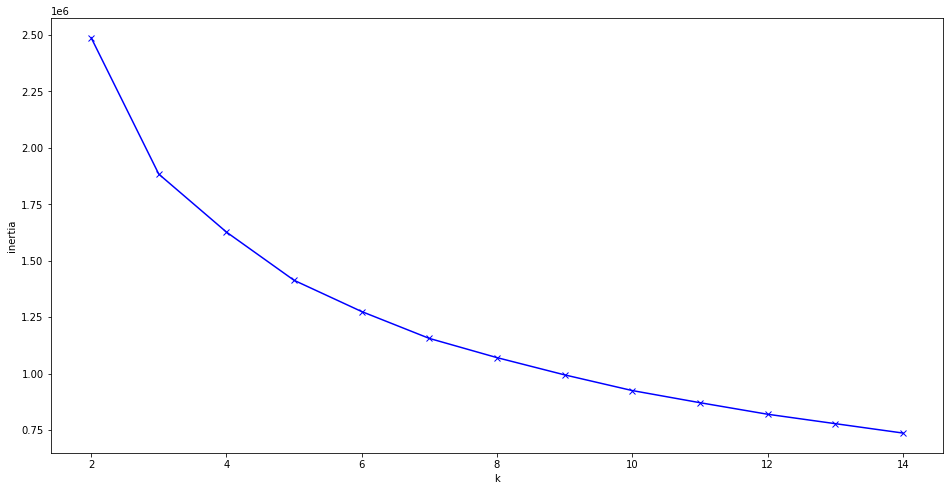

In [10]:
plt.figure(figsize=(16,8))
plt.plot(K, intertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [11]:
predict_catego = Kmean.predict(X)

In [12]:
from sklearn.metrics import silhouette_score

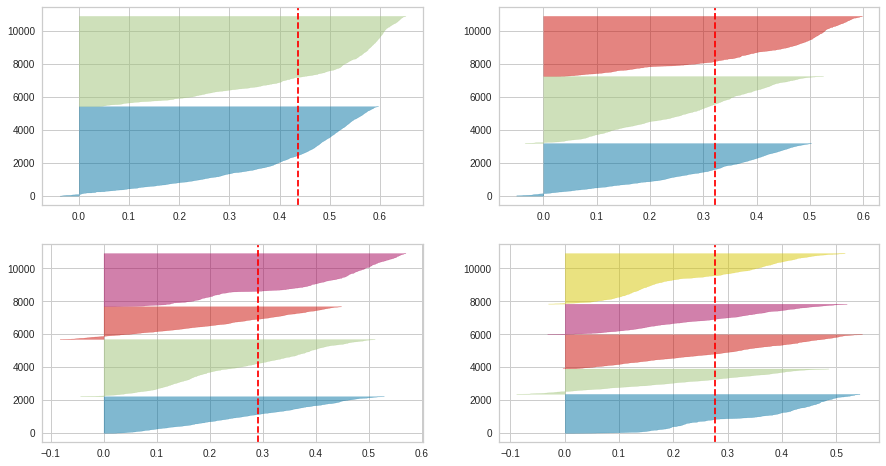

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3,4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++')
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [14]:
n_cluster = 4

In [15]:
kmodel = KMeans(n_clusters=n_cluster)
kmodel.fit(X)
predict_cluster = kmodel.predict(X)

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score

In [17]:
X['cluster'] = predict_cluster

/tmp/ipykernel_25669/1727651937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = predict_cluster


In [18]:
X


,temp,humidity,windspeed,cluster
0,9.84,81,0.0000,1
1,9.02,80,0.0000,1
2,9.02,80,0.0000,1
3,9.84,75,0.0000,1
4,9.84,75,0.0000,1
...,...,...,...,...
10881,15.58,50,26.0027,3
10882,14.76,57,15.0013,3
10883,13.94,61,15.0013,2
10884,13.94,61,6.0032,2


In [23]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

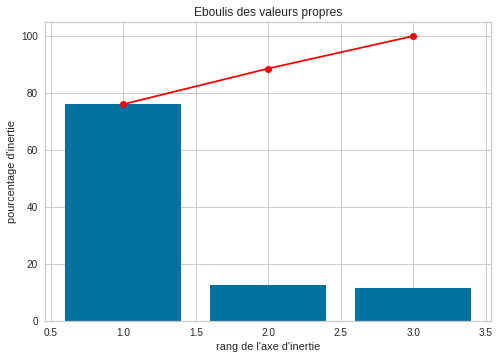

In [24]:
display_scree_plot(pca)

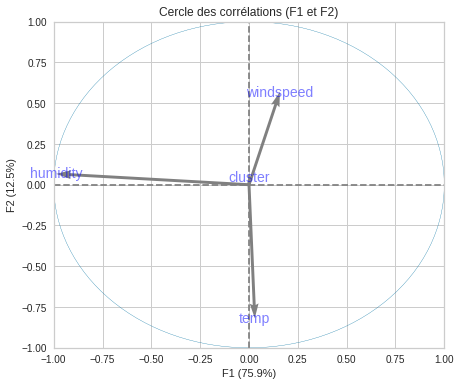

In [25]:
features =X.columns
pcs= pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

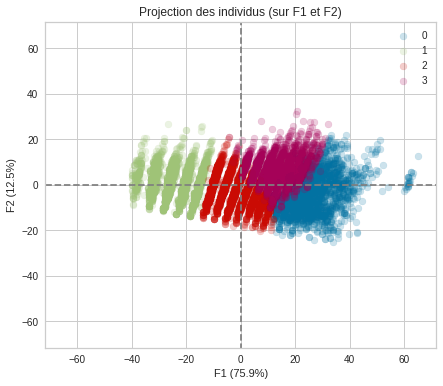

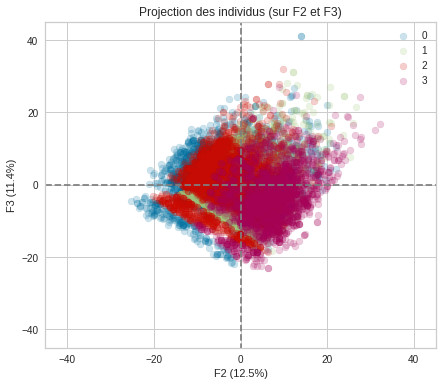

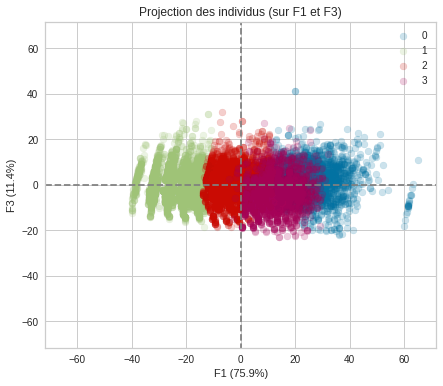

In [26]:
X_projected=pca.transform(X)
n_comp=3
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2, illustrative_var=kmodel.labels_)

In [27]:
pca.components_

array([[ 2.96706983e-02, -9.86954965e-01,  1.58236872e-01,
        -7.99089948e-04],
       [-8.18665541e-01,  6.65458382e-02,  5.68782988e-01,
         4.29452615e-02],
       [ 5.71196160e-01,  1.46599114e-01,  8.07121296e-01,
        -2.82641168e-02]])

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import re, seaborn as sns

/tmp/ipykernel_25669/1199847545.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


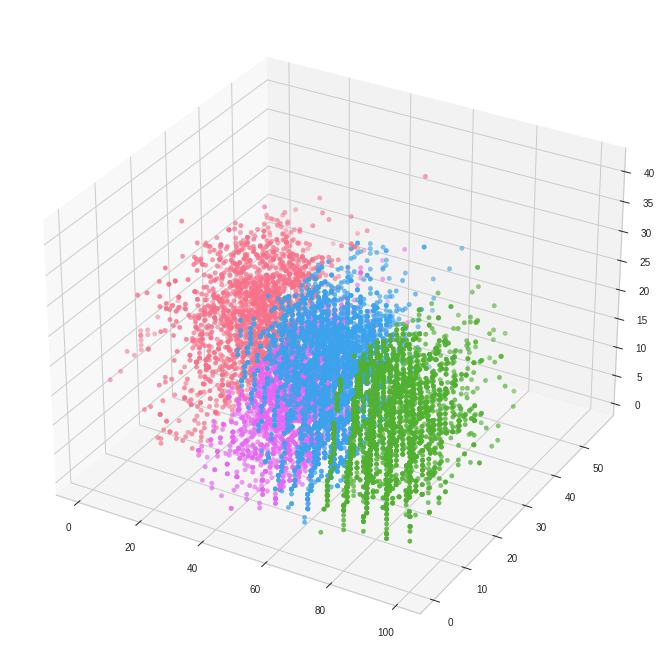

In [42]:
cmap = ListedColormap(sns.color_palette("husl").as_hex())
fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.scatter(X['humidity'], X['windspeed'],X['temp'],  c=X['cluster'], marker='o',cmap=cmap)

/tmp/ipykernel_25669/4255032083.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


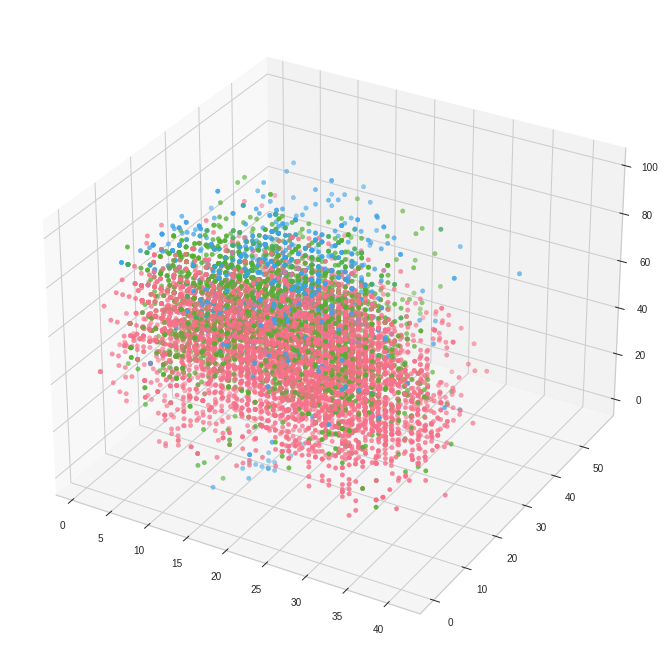

In [43]:
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
fig = plt.figure(figsize=(16,9))
ax = Axes3D(fig)
ax.scatter( df['temp'],df['windspeed'],df['humidity'],  c=df['weather'], marker='o',cmap=cmap)

In [30]:
df = df.astype({"weather":"int32"})

In [31]:
weather = df.weather.to_numpy()

In [32]:
weather

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [33]:
adjusted_rand_score(weather, predict_cluster)

0.02008019741572092

In [52]:
pca = PCA(n_components=3)
pca.fit(df.drop(['datetime', 'holiday', 'workingday', 'weather', 'count', 'casual', 'registered', 'atemp'], axis=1))

PCA(n_components=3)

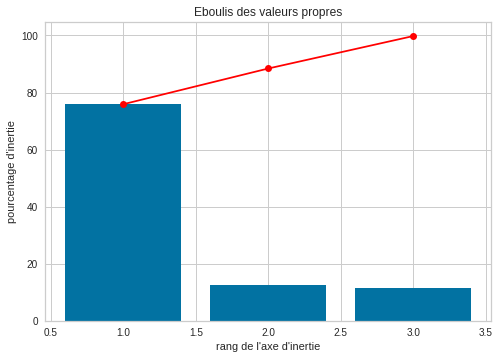

In [53]:
display_scree_plot(pca)

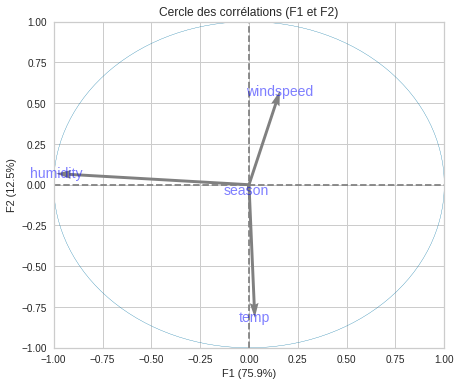

In [54]:
features =df.drop(['datetime', 'holiday', 'workingday', 'weather', 'count', 'casual', 'registered', 'atemp'], axis=1).columns
pcs= pca.components_
display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))